In [ ]:
!pip install diffusers transformers accelerate torch safetensors

In [ ]:
import torch
from diffusers import StableDiffusionPipeline
import os

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


**Task** **1**

In [ ]:
model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
)

pipe = pipe.to("cuda")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [ ]:
prompts = [
    "A futuristic city at night with neon lights",
    "A peaceful mountain landscape during sunrise",
    "A robot studying in a classroom",
    "A realistic portrait of a medieval warrior",
    "A cyberpunk street with rain and reflections"
]


In [ ]:
output_dir = "synthetic_dataset"
os.makedirs(output_dir, exist_ok=True)

for idx, prompt in enumerate(prompts):
    image = pipe(prompt).images[0]
    image.save(f"{output_dir}/image_{idx+1}.png")

print("Synthetic dataset generated successfully.")


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Synthetic dataset generated successfully.


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

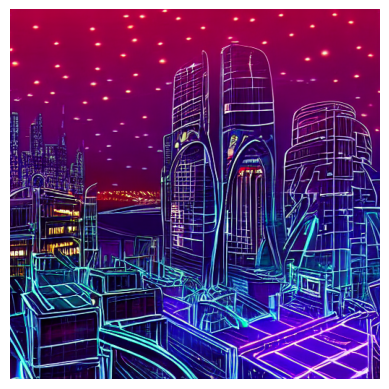

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("synthetic_dataset/image_1.png")
plt.imshow(img)
plt.axis("off")


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

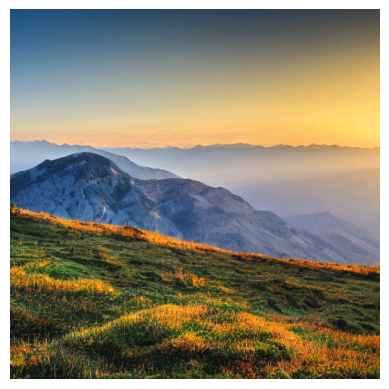

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("synthetic_dataset/image_2.png")
plt.imshow(img)
plt.axis("off")

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

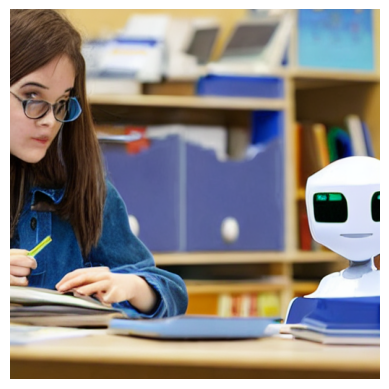

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("synthetic_dataset/image_3.png")
plt.imshow(img)
plt.axis("off")

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

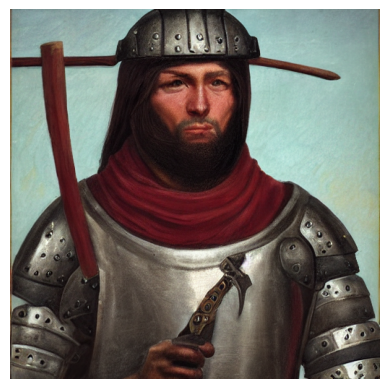

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("synthetic_dataset/image_4.png")
plt.imshow(img)
plt.axis("off")

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

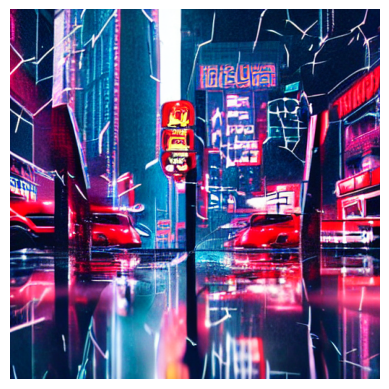

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("synthetic_dataset/image_5.png")
plt.imshow(img)
plt.axis("off")

**Task** **2**

In [ ]:
BASE_DIR = "synthetic_chest_xray_dataset_task2"
os.makedirs(BASE_DIR, exist_ok=True)

In [ ]:
dataset_labels = {
    "normal_anatomy": "healthy human lungs with normal anatomy chest X-ray",
    "infectious_patterns": "chest X-ray showing infectious lung disease such as pneumonia or viral infection",
    "lung_opacities": "chest X-ray showing lung opacities including ground glass and consolidations",
    "pleural_conditions": "chest X-ray showing pleural effusion or pneumothorax",
    "structural_lesions": "chest X-ray showing lung nodules masses or fibrosis",
    "cardiac_findings": "chest X-ray showing cardiomegaly and pulmonary vascular congestion",
    "medical_devices": "chest X-ray showing medical devices such as tubes catheters or pacemaker",
    "imaging_artifacts": "chest X-ray with imaging artifacts such as noise motion blur or exposure issues",
    "view_positioning": "chest X-ray with different views and patient positioning PA AP supine erect",
    "domain_shift": "chest X-ray showing domain shift due to different scanners hospitals and resolutions"
}


In [ ]:
BASE_PROMPT = (
    "Very high quality realistic chest X-ray showing {}, "
    "medical radiology style, grayscale, diagnostic accuracy, "
    "sharp details, hospital imaging"
)


In [ ]:
IMAGES_PER_CATEGORY = 5

for category, label in dataset_labels.items():
    category_path = os.path.join(BASE_DIR, category)
    os.makedirs(category_path, exist_ok=True)

    prompt = BASE_PROMPT.format(label)
    print(f"Generating images for {category}")

    for i in range(IMAGES_PER_CATEGORY):
        image = pipe(
            prompt,
            guidance_scale=8.5,
            num_inference_steps=40
        ).images[0]

        image.save(f"{category_path}/{category}_{i+1}.png")

print("TASK–2 synthetic dataset generation completed.")


Generating images for normal_anatomy


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Generating images for infectious_patterns


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Generating images for lung_opacities


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Generating images for pleural_conditions


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Generating images for structural_lesions


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Generating images for cardiac_findings


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Generating images for medical_devices


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Generating images for imaging_artifacts


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Generating images for view_positioning


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Generating images for domain_shift


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

TASK–2 synthetic dataset generation completed.


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

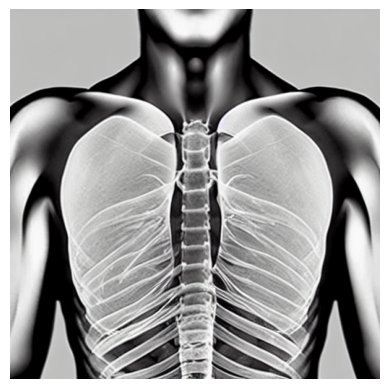

In [ ]:
sample_image = Image.open(
    f"{BASE_DIR}/normal_anatomy/normal_anatomy_1.png"
)

plt.imshow(sample_image)
plt.axis("off")


**TASK 3**

In [21]:
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt


In [29]:
model = models.densenet121(pretrained=True)

num_features = model.classifier.in_features
model.classifier = torch.nn.Linear(num_features, 2)  # Normal vs Abnormal
model.eval()


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [30]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


In [31]:
DATASET_DIR = "synthetic_chest_xray_dataset_task2"

In [32]:
def get_true_label(folder_name):
    if folder_name == "normal_anatomy":
        return 0  # Normal
    else:
        return 1  # Abnormal

In [33]:
correct = 0
total = 0

print("Image | Ground Truth | Predicted")
print("----------------------------------")

for category in os.listdir(DATASET_DIR):
    category_path = os.path.join(DATASET_DIR, category)

    if not os.path.isdir(category_path):
        continue

    true_label = get_true_label(category)

    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)

        image = Image.open(img_path).convert("RGB")
        input_tensor = transform(image).unsqueeze(0)

        with torch.no_grad():
            output = model(input_tensor)
            predicted_label = torch.argmax(output, dim=1).item()

        print(f"{img_name} | {true_label} | {predicted_label}")

        if predicted_label == true_label:
            correct += 1

        total += 1


Image | Ground Truth | Predicted
----------------------------------
structural_lesions_2.png | 1 | 0
structural_lesions_4.png | 1 | 1
structural_lesions_5.png | 1 | 0
structural_lesions_1.png | 1 | 0
structural_lesions_3.png | 1 | 0
medical_devices_5.png | 1 | 1
medical_devices_3.png | 1 | 1
medical_devices_4.png | 1 | 1
medical_devices_2.png | 1 | 0
medical_devices_1.png | 1 | 1
infectious_patterns_2.png | 1 | 1
infectious_patterns_4.png | 1 | 1
infectious_patterns_1.png | 1 | 0
infectious_patterns_5.png | 1 | 1
infectious_patterns_3.png | 1 | 1
normal_anatomy_5.png | 0 | 1
normal_anatomy_3.png | 0 | 0
normal_anatomy_4.png | 0 | 1
normal_anatomy_1.png | 0 | 1
normal_anatomy_2.png | 0 | 0
cardiac_findings_2.png | 1 | 1
cardiac_findings_1.png | 1 | 1
cardiac_findings_3.png | 1 | 1
cardiac_findings_4.png | 1 | 1
cardiac_findings_5.png | 1 | 0
pleural_conditions_4.png | 1 | 0
pleural_conditions_5.png | 1 | 0
pleural_conditions_2.png | 1 | 1
pleural_conditions_1.png | 1 | 0
pleural_conditi

In [34]:
accuracy = (correct / total) * 100
print("\nTotal Images:", total)
print("Correct Predictions:", correct)
print("Final Accuracy: {:.2f}%".format(accuracy))



Total Images: 50
Correct Predictions: 33
Final Accuracy: 66.00%
